In [1]:
%load_ext autoreload
%autoreload 2

import torch
import numpy as np
import matplotlib.pyplot as plt
from RNN_scripts import dms

import MARBLE
from MARBLE import utils, geometry, plotting, postprocessing
import example_utils as ex_utils

# Load trained model

In [2]:
_, net1 = ex_utils.load_network(f'./outputs/RNN_data/dms_rank2_500.pt')
_, net2 = ex_utils.load_network(f'./outputs/RNN_data/dms_rank2_500_2.pt')

Display input/output trajectories

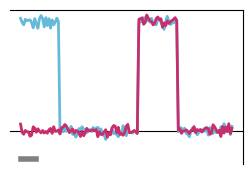

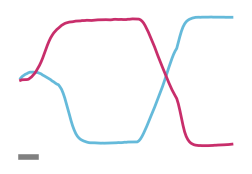

In [3]:
dms.stimulus1_duration_min = 500
dms.stimulus1_duration_max = 500
dms.delay_duration_min = 1000
dms.delay_duration_max = 1000
dms.stimulus2_duration_min = 500
dms.stimulus2_duration_max = 500
dms.decision_duration = 200
dms.setup()

x1 = dms.generate_dms_data(1, type='A-A')[0]
x2 = dms.generate_dms_data(1, type='B-A')[0]
outp1, traj1 = net1.forward(x1)
outp2, traj2 = net1.forward(x2)
x1, x2 = x1.squeeze().numpy(), x2.squeeze().numpy()
outp1 = outp1.detach().squeeze().numpy()
outp2 = outp2.detach().squeeze().numpy()

def time_mapping(t):
    return t * dms.deltaT / 1000

fig, ax = plt.subplots(figsize=(3, 2))

ax.plot(time_mapping(np.arange(x1.shape[0])), x1[:, 0], c='#65BADA', zorder=30, lw=2)
ax.plot(time_mapping(np.arange(x1.shape[0])), x2[:, 0], c='#C82E6B', zorder=30, lw=2)
ax.spines['bottom'].set_position('zero')
ax.spines['left'].set_visible(False)
ax.set(xticks=[], ylim=(-.3, 1.1), yticks=[])
ax.plot([0, 0.2], [-.25, -.25], c='gray', lw=4)
#plt.savefig('./outputs/input.svg', bbox_inches='tight')
plt.show()

fig, ax = plt.subplots(figsize=(3, 2))
ax.plot(time_mapping(np.arange(outp1.shape[0])), outp1, color='#65BADA', zorder=30, lw=2)
ax.plot(time_mapping(np.arange(outp1.shape[0])), outp2, color='#C82E6B', zorder=30, lw=2)
ax.set_axis_off()
ax.plot([0, 0.2], [-1.25, -1.25], c='gray', lw=4)
#plt.savefig('./outputs/output.svg', bbox_inches='tight')
plt.show()

Visualising two network populations

pop 0: slope=0.06, intercept=0.02
pop 1: slope=-0.24, intercept=-0.18
pop 0: slope=-0.01, intercept=-0.05
pop 1: slope=0.04, intercept=-0.01
pop 0: slope=0.03, intercept=0.17
pop 1: slope=-0.06, intercept=-0.22
pop 0: slope=0.74, intercept=0.00
pop 1: slope=0.70, intercept=0.08
pop 0: slope=-0.08, intercept=0.01
pop 1: slope=0.05, intercept=0.07
pop 0: slope=-0.01, intercept=-0.14
pop 1: slope=0.04, intercept=-0.05
pop 0: slope=-0.06, intercept=-0.32
pop 1: slope=0.09, intercept=0.38
pop 0: slope=0.72, intercept=-0.03
pop 1: slope=0.13, intercept=0.54


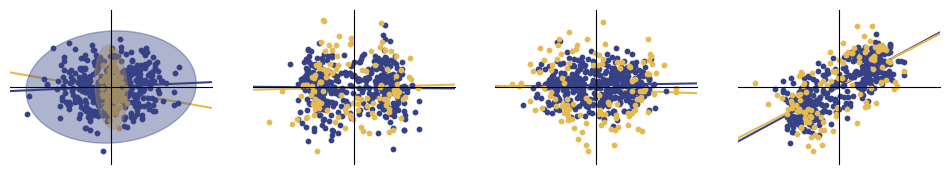

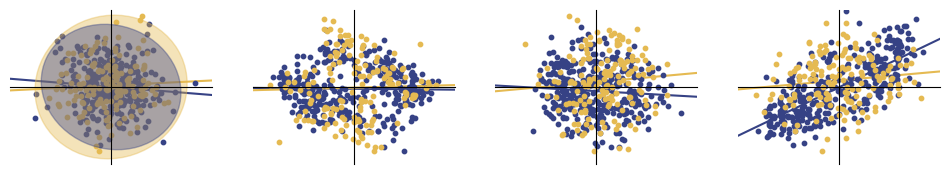

In [4]:
# Visualizing those 2 populations
ex_utils.plot_coefficients(net1)
#plt.savefig('./outputs/GNN_parameter_distribution_1.svg')
ex_utils.plot_coefficients(net2)
#plt.savefig('./outputs/GNN_parameter_distribution_2.svg')

# Create new network by fitting Gaussian mixture to the connectivity space

In [5]:
z1, net1_sampled_1 = ex_utils.sample_network(net1, f'./outputs/RNN_data/dms_rank2_500_sampled_1.pt')
z2, net1_sampled_2 = ex_utils.sample_network(net1, f'./outputs/RNN_data/dms_rank2_500_sampled_2.pt')

Visualising two network populations

pop 0: slope=0.04, intercept=0.00
pop 1: slope=-0.32, intercept=0.00
pop 0: slope=-0.06, intercept=-0.01
pop 1: slope=0.04, intercept=-0.15
pop 0: slope=0.03, intercept=-0.01
pop 1: slope=-0.06, intercept=0.50
pop 0: slope=0.75, intercept=-0.05
pop 1: slope=0.71, intercept=0.06
pop 0: slope=0.03, intercept=-0.05
pop 1: slope=-0.69, intercept=0.12
pop 0: slope=0.09, intercept=0.01
pop 1: slope=-0.01, intercept=0.30
pop 0: slope=0.11, intercept=-0.03
pop 1: slope=-0.29, intercept=0.46
pop 0: slope=0.70, intercept=-0.04
pop 1: slope=0.64, intercept=-0.16


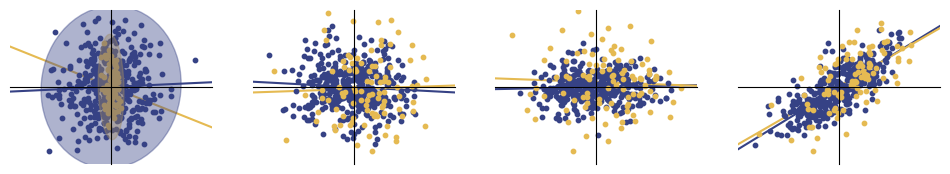

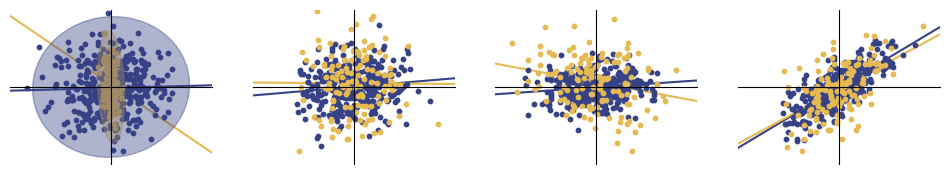

In [6]:
ex_utils.plot_coefficients(net1_sampled_1)
#plt.savefig('./outputs/GNN_parameter_distribution_resample_1.svg')
ex_utils.plot_coefficients(net1_sampled_2)
#plt.savefig('./outputs/GNN_parameter_distribution_resample_2.svg')

# Generate synthetic data

In [7]:
n_traj=200
n_gains=20
stim1_begin, stim1_end, stim2_begin, stim2_end, decision = 25, 50, 200, 225, 275
epochs = [0, stim1_begin, stim1_end, stim2_begin, stim2_end, decision]
gain = np.linspace(1,0,n_gains)
    
input = torch.zeros(n_gains, decision, 2)
for i, g in enumerate(gain):
    input[i, stim1_begin:stim1_end, 0] = g
    input[i, stim2_begin:stim2_end, 0] = g
    
traj11 = ex_utils.generate_trajectories(net1_sampled_1, input, epochs, n_traj, fname='./outputs/RNN_data/RNN_trajectories11.pkl')
traj12 = ex_utils.generate_trajectories(net1_sampled_2, input, epochs, n_traj, fname='./outputs/RNN_data/RNN_trajectories12.pkl')
traj2 = ex_utils.generate_trajectories(net2, input, epochs, n_traj, fname='./outputs/RNN_data/RNN_trajectories2.pkl')

# Plot phase portraits of two different dynamics  

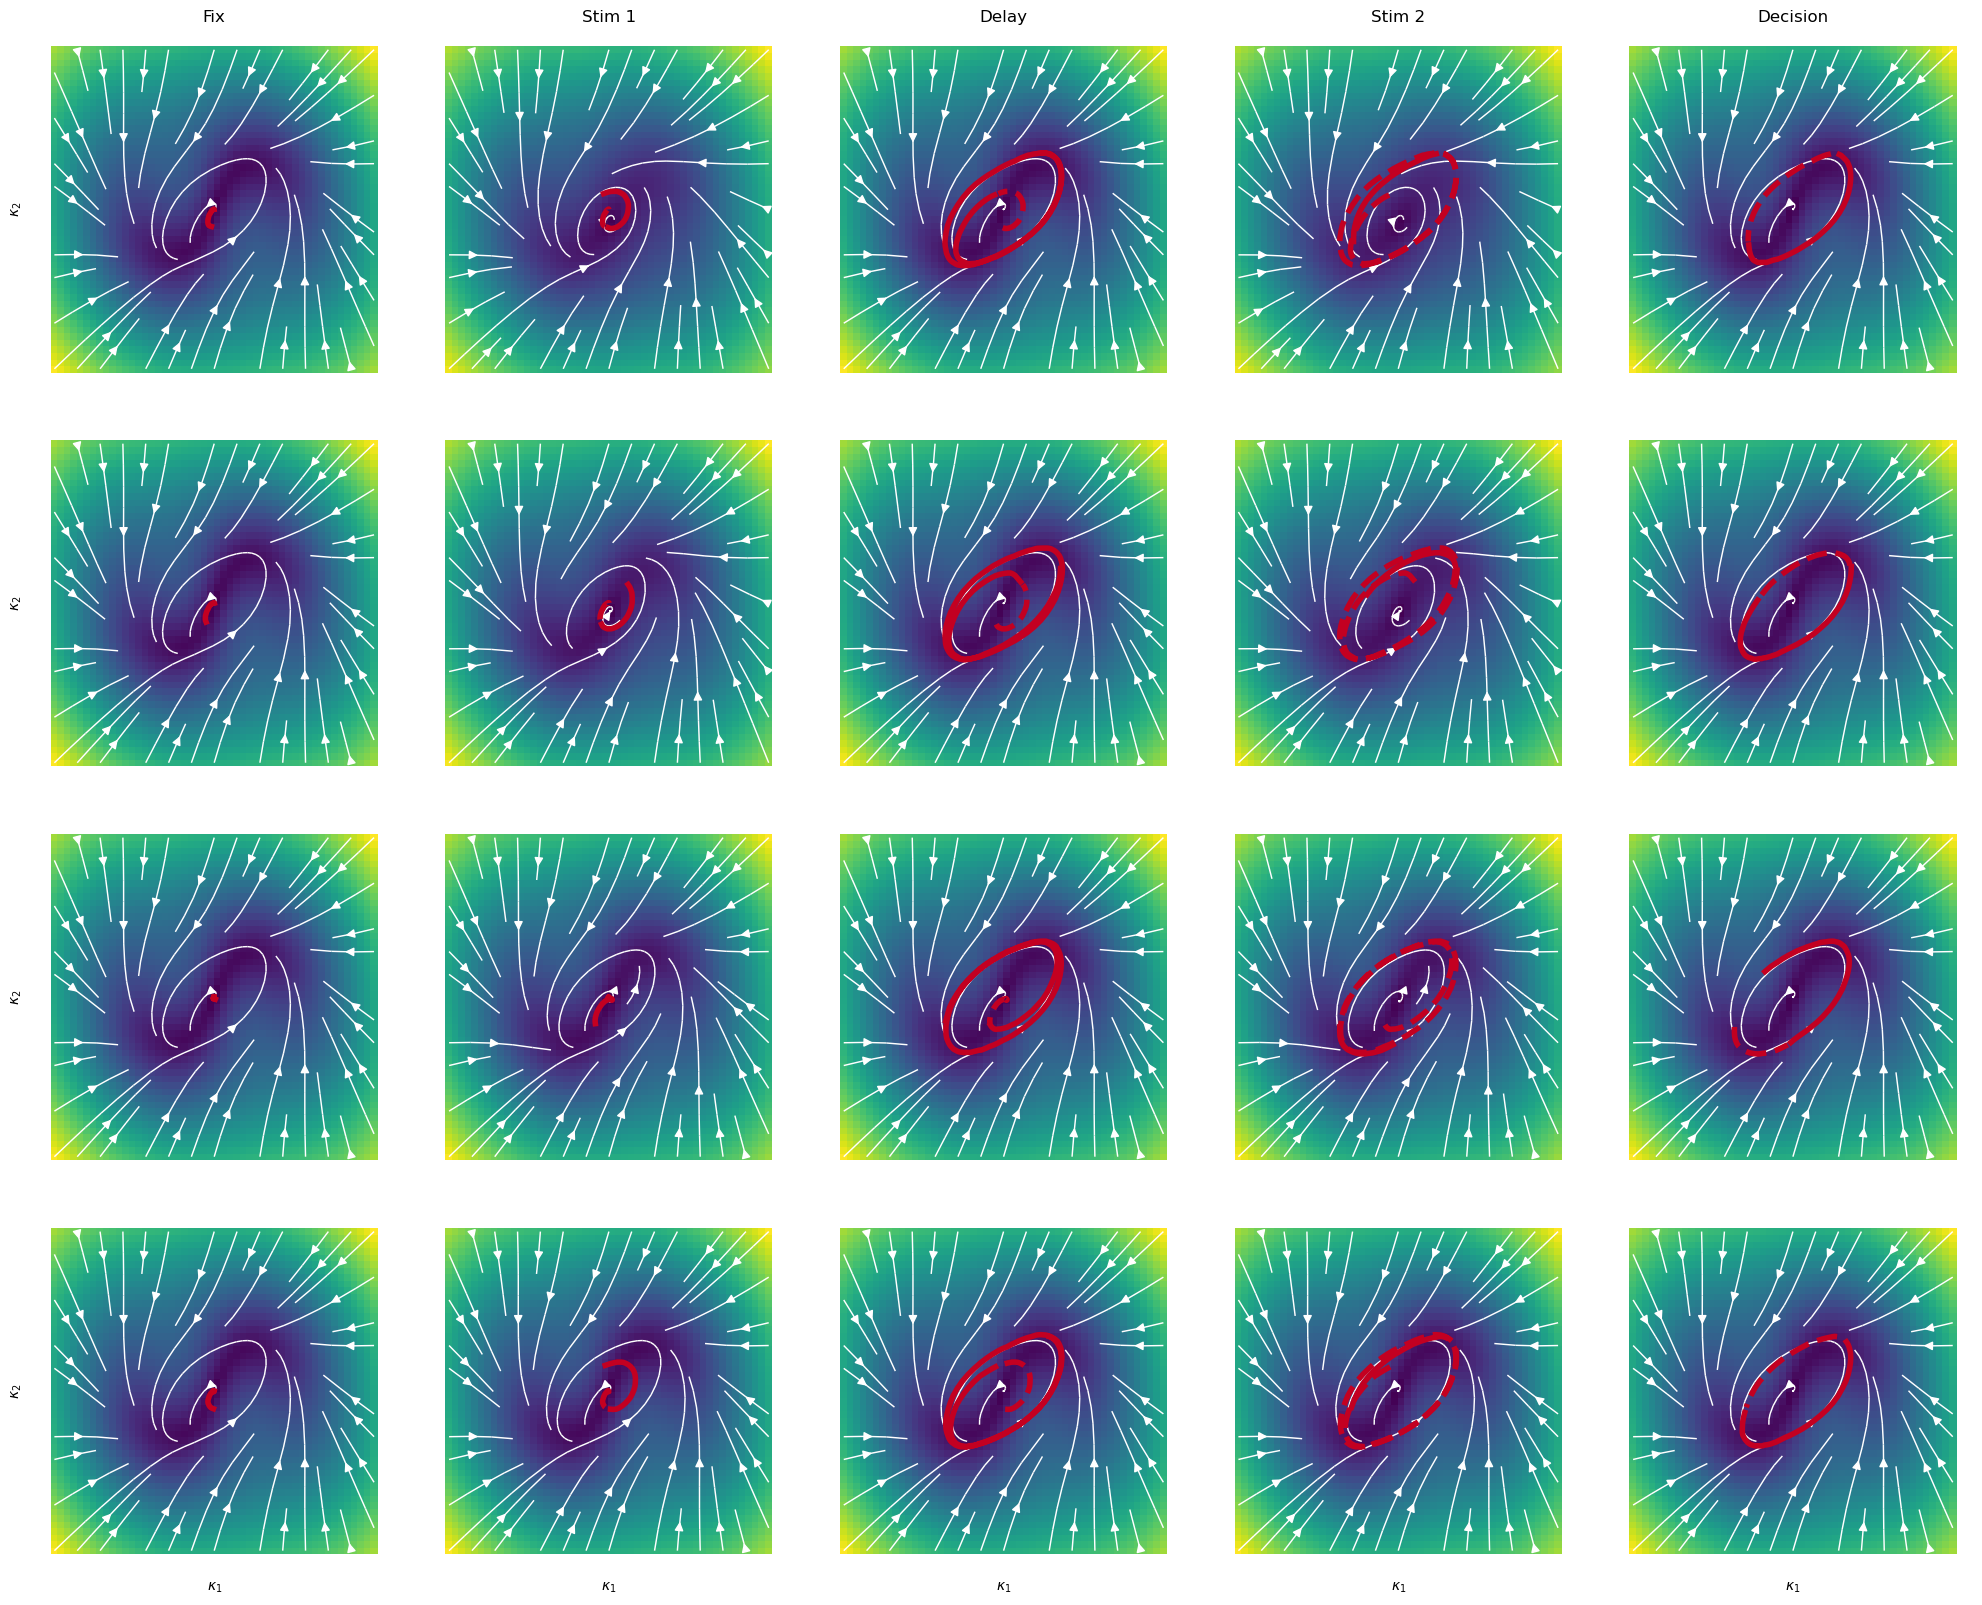

In [8]:
ex_utils.plot_experiment(net1_sampled_2, input, traj12, epochs, rect=(-6, 6, -4, 4), traj_to_show=1)
#plt.savefig('./outputs/fields_all_conditions.svg')

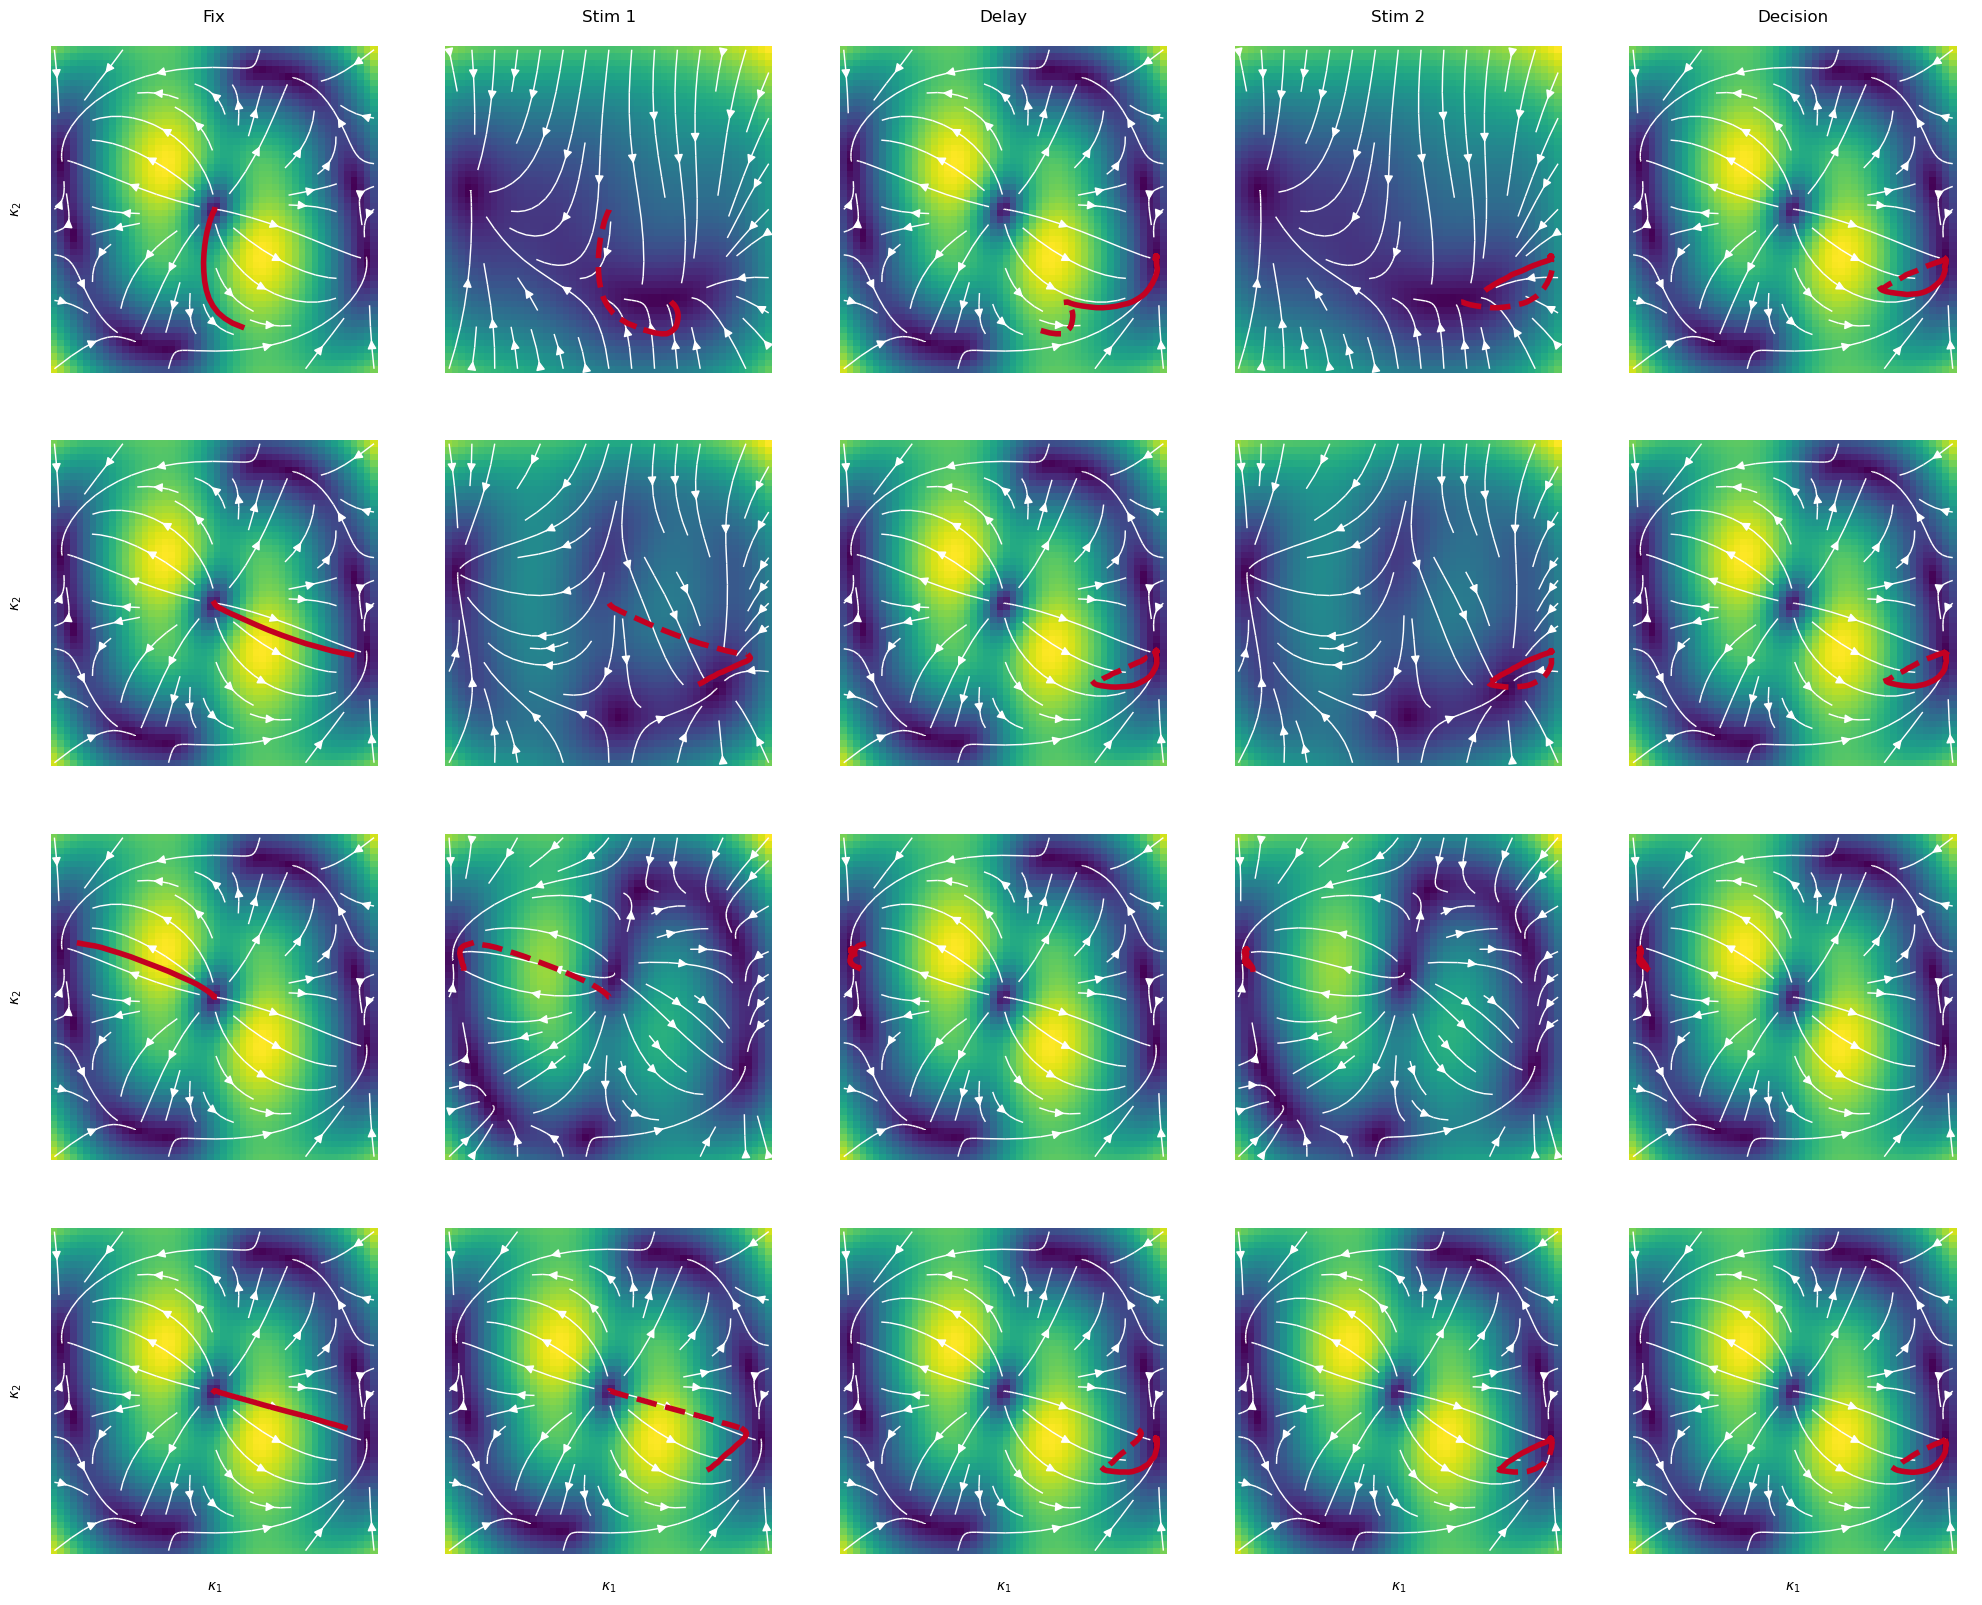

In [9]:
ex_utils.plot_experiment(net2, input, traj2, epochs, rect=(-6, 6, -4, 4), traj_to_show=1)
#plt.savefig('./outputs/fields_all_conditions_2.svg')

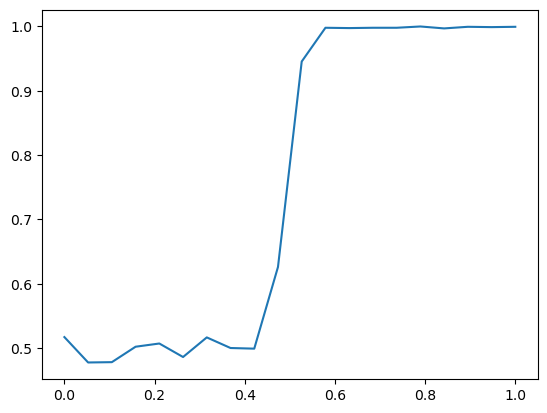

In [10]:
accuracy = []
for g in gain:
    _, _, _, x_val, y_val, mask_val = dms.generate_dms_data(10000, gain=g)
    loss, acc = dms.test_dms(net1, x_val, y_val, mask_val)
    accuracy.append(acc)
    
plt.plot(gain, accuracy)
#plt.savefig('./outputs/accuracy.svg')

# Concatenate data and create datasets

In [11]:
#pos, vel = ex_utils.aggregate_data(traj2, epochs, transient=10)
transient = 15
pos11, vel11 = ex_utils.aggregate_data(traj11, epochs, transient)
pos12, vel12 = ex_utils.aggregate_data(traj12, epochs, transient)

pos2, vel2 = ex_utils.aggregate_data(traj2, epochs, transient)

pos = pos11 + pos12 + pos2
vel = vel11 + vel12 + vel2

Explained variance:  [0.81756004 0.15379935 0.02376149]
Explained variance:  [0.81453549 0.14543365 0.03331406]
Explained variance:  [0.930463   0.04519988 0.02326665]


# Train a model on network solution 1

In [12]:
data = utils.construct_dataset(pos11, features=vel11, graph_type='cknn', k=15, stop_crit=0.01, vector=False)

---- Embedding dimension: 3
---- Signal dimension: 3

Vector computations are disabled

---- Computing kernels ... Done 
---- Computing eigendecomposition ... Done 


In [17]:
par = {'epochs': 40, #optimisation epochs
       'order': 2, #order of derivatives
       'hidden_channels': 64, #number of internal dimensions in MLP
       'out_channels': 5,
       'inner_product_features': False,
      }

model = MARBLE.net(data, loadpath='./outputs/RNN_data', par=par)
#model.run_training(data, outdir='./outputs/RNN_data/')


---- Settings: 

epochs : 40
order : 2
hidden_channels : 64
out_channels : 5
inner_product_features : False
batch_size : 64
lr : 0.01
momentum : 0.9
diffusion : False
include_positions : False
frac_sampled_nb : -1
dropout : 0.0
n_lin_layers : 2
bias : True
vec_norm : False
batch_norm : None
seed : 0
processes : 1
dim_signal : 3
dim_emb : 3
n_sampled_nb : -1

---- Number of features to pass to the MLP:  39
---- Total number of parameters:  2886


In [18]:
data = model.evaluate(data)
data = postprocessing(data, n_clusters=60)

Performed umap embedding on embedded results.


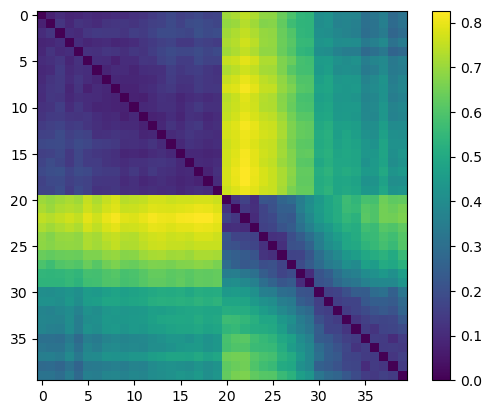

In [20]:
im = plt.imshow(data.dist)
plt.colorbar(im)
#plt.savefig('./outputs/dist_matrix_1.svg')

Performed MDS embedding on embedded results.


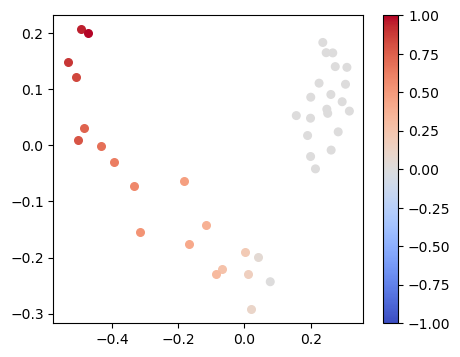

In [21]:
labels = [0. for g in gain ] + [g for g in gain ]

fig = plt.figure(figsize=(5, 4))
ax = fig.add_subplot()
emb_MDS, _ = geometry.embed(data.dist, embed_typ = 'MDS')
ax = plotting.embedding(emb_MDS, labels, ax=ax, s=30, alpha=1, axes_visible=True)
#plt.savefig('./outputs/stimulus_vs_no_stimulus.svg')

# Train network with solution II and solution II

In [22]:
data = utils.construct_dataset(pos, features=vel, graph_type='cknn', k=15, stop_crit=0.01, vector=False)

---- Embedding dimension: 3
---- Signal dimension: 3

Vector computations are disabled

---- Computing kernels ... Done 
---- Computing eigendecomposition ... Done 


In [23]:
par = {'epochs': 40, #optimisation epochs
       'order': 2, #order of derivatives
       'hidden_channels': 64, #number of internal dimensions in MLP
       'out_channels': 5,
       'inner_product_features': True,
      }

model = MARBLE.net(data, par=par)
model.run_training(data, outdir='./outputs/RNN_data/')


---- Settings: 

epochs : 40
order : 2
hidden_channels : 64
out_channels : 5
inner_product_features : True
batch_size : 64
lr : 0.01
momentum : 0.9
diffusion : False
include_positions : False
frac_sampled_nb : -1
dropout : 0.0
n_lin_layers : 2
bias : True
vec_norm : False
batch_norm : None
seed : 0
processes : 1
dim_signal : 3
dim_emb : 3
n_sampled_nb : -1

---- Number of features to pass to the MLP:  13
---- Total number of parameters:  1339

---- Training network ...

Epoch: 1, Training loss: 1.1382, Validation loss: 1.0877, lr: 0.0100 *
Epoch: 2, Training loss: 1.0229, Validation loss: 1.0424, lr: 0.0100 *
Epoch: 3, Training loss: 0.9970, Validation loss: 1.0333, lr: 0.0100 *
Epoch: 4, Training loss: 0.9774, Validation loss: 1.0258, lr: 0.0100 *
Epoch: 7, Training loss: 0.9646, Validation loss: 1.0245, lr: 0.0100
Epoch: 8, Training loss: 0.9620, Validation loss: 1.0063, lr: 0.0100 *
Epoch: 9, Training loss: 0.9651, Validation loss: 0.9965, lr: 0.0100 *
Epoch: 10, Training loss: 0.9

In [ ]:
data = model.evaluate(data)
data = postprocessing(data)

In [ ]:
n = len(data.dist)//6
dist = data.dist[:2*n,:2*n]
ind = list(range(n,2*n)) + list(range(3*n,4*n)) + list(range(5*n,6*n))
dist = data.dist[ind,:][:,ind]
im = plt.imshow(dist)
plt.colorbar(im)

In [ ]:
labels = [g for g in gain ]

fig = plt.figure(figsize=(8, 4))
ax = fig.add_subplot()
emb_MDS, _ = geometry.embed(dist, embed_typ = 'MDS')
ax = plotting.embedding(emb_MDS[:n], labels, ax=ax, s=30, alpha=1, axes_visible=True)
ax = plotting.embedding(emb_MDS[n:2*n], labels, ax=ax, s=30, alpha=1, axes_visible=True, cmap='PuOr')
ax = plotting.embedding(emb_MDS[2*n:], labels, ax=ax, s=30, alpha=1, axes_visible=True, cmap='PRGn')
#plt.savefig('./outputs/dist_different_computations.svg')